# Data Extraction and Combination

Notebook to perform tasks to extract, simplify, combine, and analyze data from several sources.

## Data Sources

- Land Area figures for New Hampshire: NH GRANIT system; compiled at [NH Office of Strategic Initiatives](https://www.nh.gov/osi/planning/services/gis/maps.htm), May 2021
- New Hampshire Political Boundaries at 1:24,000 Scale: [NH GRANIT system](https://granit.unh.edu/cgi-bin/nhsearch?dset=pb&#47;nh)
- New Hampshire Conservation/Public Lands at 1:24,000 Scale: [NH GRANIT system](https://www.granit.unh.edu/cgi-bin/nhsearch?dset=consnh&#47;nh)
    - [Interactive map](https://data-nhgranit.opendata.arcgis.com/datasets/new-hampshire-conservation-public-lands/explore?location=43.117182%2C-71.544725%2C13.00)

## Package Imports and Helper Functions

In [1]:
# Package imports
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import geemap

pd.set_option('max_columns', 50)

In [44]:
# Map inputs
nh_center = [43.78699687528447, -71.51658744025995]

In [2]:
# Helper function to convert square feet to acres
def sq_ft_to_acres(sq_ft):
    """
    Returns area in acres when square feet are input.
    :param sq_ft: numeric type, area in square feet
    :return: float, area in acres
    """
    conv_factor = 43560.0
    return sq_ft / conv_factor

## Data Imports

In [3]:
# Import land area data
land_area = pd.read_csv('./data/NH-land-area-figures-consolidated.csv',
                        header=3)

In [4]:
land_area.head()

,County,Municipality,Total acres,Total sq. miles,Land acres,Land sq. miles,Water acres,Water sq. miles
0,Belknap,Alton,53230.5,83.17,40636.10,63.49,12594.40,19.68
1,Belknap,Barnstead,28758.7,44.94,27215.21,42.52,1543.49,2.41
2,Belknap,Belmont,20427.6,31.92,19190.38,29.98,1237.22,1.93
3,Belknap,Center Harbor,10394.4,16.24,8498.05,13.28,1896.35,2.96
4,Belknap,Gilford,34243.7,53.51,24786.22,38.73,9457.48,14.78


In [5]:
land_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           259 non-null    object 
 1   Municipality     259 non-null    object 
 2   Total acres      259 non-null    float64
 3   Total sq. miles  259 non-null    float64
 4   Land acres       259 non-null    float64
 5   Land sq. miles   259 non-null    float64
 6   Water acres      259 non-null    float64
 7   Water sq. miles  259 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.3+ KB


In [6]:
total_areas = land_area.groupby(['County']).sum()
total_areas

,Total acres,Total sq. miles,Land acres,Land sq. miles,Water acres,Water sq. miles
County,,,,,,
Belknap,300786.19,469.98,256443.63,400.68,44342.57,69.28
Carroll,635817.97,993.47,595805.22,930.95,40012.76,62.52
Cheshire,466514.34,728.94,450805.97,704.39,15708.39,24.54
Coos,1171969.27,1831.21,1148425.31,1794.41,23543.98,36.77
Grafton,1119743.95,1749.59,1093489.36,1708.56,26254.63,41.02
Hillsborough,571152.78,892.46,555882.47,868.58,15270.34,23.85
Merrimack,611148.30,954.92,593770.15,927.73,17378.17,27.12
Rockingham,465182.48,726.86,445326.83,695.83,19855.68,31.01
Strafford,244860.75,382.60,233827.90,365.36,11032.86,17.23


In [7]:
# Create mapping of County name to ID number
county_map = pd.DataFrame({'COUNTY_ID': range(1, 20, 2),
                           'COUNTY_NAME': list(total_areas.index)})
county_map

,COUNTY_ID,COUNTY_NAME
0,1,Belknap
1,3,Carroll
2,5,Cheshire
3,7,Coos
4,9,Grafton
5,11,Hillsborough
6,13,Merrimack
7,15,Rockingham
8,17,Strafford
9,19,Sullivan


In [8]:
# Import political boundaries (pb) data
pbp_path = '../../NH_PoliticalBoundaries/GRANIT_20220220160347/pbp.shp'  # Polygons

In [9]:
pb_poly = gpd.read_file(pbp_path, driver='shapefile')

In [10]:
pb_poly.head()

,FIPS,NAME,RPA,ACRES,COUNTY,geometry
0,7160,Pittsburg,1,186430.5,7,"POLYGON ((1063158.250 1002584.875, 1063233.000..."
1,7040,Clarksville,1,39915.8,7,"POLYGON ((1059756.000 928359.250, 1059898.250 ..."
2,7005,Atkinson & Gilmanton,1,12351.3,7,"POLYGON ((1111451.250 916720.625, 1111518.250 ..."
3,7190,Stewartstown,1,30019.1,7,"POLYGON ((1019728.688 911317.500, 1019769.188 ..."
4,7175,Second College,1,26773.9,7,"POLYGON ((1117369.750 895118.500, 1117506.500 ..."


In [11]:
pb_poly.shape

(259, 6)

In [12]:
pb_poly.crs

<Derived Projected CRS: PROJCS["NAD83 / New Hampshire (ftUS)",GEOGCS["NAD8 ...>
Name: NAD83 / New Hampshire (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

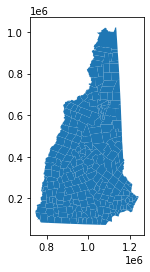

In [13]:
pb_poly.plot()

In [14]:
# Data check: Pittsburg area in sq ft and acres
p_name = pb_poly.loc[0, 'NAME']
pitts_sqft = pb_poly.loc[0, 'geometry'].area

print(f'{p_name} sq ft: {pitts_sqft}')
print(f'{p_name} acres: {sq_ft_to_acres(pitts_sqft)}')

Pittsburg sq ft: 8120912285.074219
Pittsburg acres: 186430.4932294357


In [15]:
# Import public and conservation land (pcl) data
pcl_path = '../../NH_PublicConservationLand/GRANIT_20220220154602/consnh.shp'

In [16]:
public = gpd.read_file(pcl_path, driver='shapefile')

In [17]:
public.head()

,SHAPE_Leng,SHAPE_Area,TID,NAME,NAMEALT,P_NAME,P_NAMEALT,PPTYPE,PPTERMTYPE,PPTERM,SPTYPE1,SPTYPE2,PPAGENCY,PPAGENTYPE,SPAGENCY1,SPAGENCY2,RSIZE,CSIZE,P_RSIZE,P_CSIZE,PROGRAM,LEVEL_,MSTATUS,SOURCE,ACCURACY,COBKPG,DATEREC1,DATEREC2,ACCESS,DATEADDED,DATEALTER,NOTES1,NOTES2,NOTES3,NOTES4,PID,GAP_STATUS,OWNERTYPE,geometry
0,83426.545022,2.163150e+08,006-004 -002,Connecticut Lakes WMA North (West),None,Connecticut Lakes Natural Area,Connecticut Lakes Headwaters,FO,P,-98,CE,CE,32000,3,52010,31000,-999.0,4965.930,25000.0,25001.000,7,1,3,NH DRED/SURVEY,1,07/1018/197,20021230,None,1,20050117,20170418,"Other Programs: LCHIP, N.A. Wetlands Conservat...",BOUNDARY ADJUSTED TO MEET 2009 DRED SURVEY CT ...,Boundary updated to match 006-001 -001,None,006-004 -,3,3,"POLYGON ((1099405.625 1002946.688, 1099033.625..."
1,61619.397201,4.721541e+07,006-004 -003,Connecticut Lakes WMA North (East),None,Connecticut Lakes Natural Area,Connecticut Lakes Headwaters,FO,P,-98,CE,CE,32000,3,52010,31000,-999.0,1083.920,25000.0,25001.000,7,1,3,NH DRED/SURVEY,1,07/1018/197,20021230,None,1,20050117,20170418,"Other Programs: LCHIP, N.A. Wetlands Conservat...",BOUNDARY ADJUSTED TO MEET 2009 DRED SURVEY CT ...,Boundary updated to match 006-001 -001,None,006-004 -,3,3,"POLYGON ((1108214.134 1000715.787, 1108214.125..."
2,22319.159084,4.695122e+06,006-001 -004,Connecticut Lakes State Forest,None,Connecticut Lakes State Forest,None,FO,U,-99,None,None,31000,3,0,0,-999.0,107.786,1531.0,1530.510,0,1,2,USGS,2,07/284/376,19351104,None,1,None,20170418,NH DRED,BOUNDARIES UPDATED WITH DATA SENT FROM NH F&G ...,Boundary and attributes updated by NH DRED,None,006-001 -,2,3,"POLYGON ((1102884.216 960520.713, 1102849.300 ..."
3,7552.234495,3.371443e+06,006-002 -001,Fourth Connecticut Lake Preserve,None,Fourth Connecticut Lake Preserve,None,FO,U,-99,None,None,52010,5,0,0,78.1,77.398,78.1,77.398,0,1,1,SURVEY,2,None,1990,None,1,None,20050117,BOUNDARIES UPDATED WITH DATA SENT FROM NH F&G,None,None,None,006-002 -,1,5,"POLYGON ((1101565.750 1002827.688, 1100987.125..."
4,31544.856081,1.836509e+07,006-003 -001,Norton Pool Preserve,None,Norton Pool Preserve,None,FO,U,-99,None,None,52010,5,0,0,-999.0,421.606,427.1,422.936,0,1,1,SURVEY,1,None,1986,None,1,None,None,1 OF 2 TRACTS,None,None,None,006-003 -,1,5,"POLYGON ((1126678.250 982401.250, 1126702.250 ..."


In [18]:
public.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12591 entries, 0 to 12590
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SHAPE_Leng  12591 non-null  float64 
 1   SHAPE_Area  12591 non-null  float64 
 2   TID         12591 non-null  object  
 3   NAME        12591 non-null  object  
 4   NAMEALT     1110 non-null   object  
 5   P_NAME      12591 non-null  object  
 6   P_NAMEALT   336 non-null    object  
 7   PPTYPE      12591 non-null  object  
 8   PPTERMTYPE  12591 non-null  object  
 9   PPTERM      12591 non-null  int64   
 10  SPTYPE1     2460 non-null   object  
 11  SPTYPE2     290 non-null    object  
 12  PPAGENCY    12591 non-null  int64   
 13  PPAGENTYPE  12591 non-null  int64   
 14  SPAGENCY1   12591 non-null  int64   
 15  SPAGENCY2   12591 non-null  int64   
 16  RSIZE       12591 non-null  float64 
 17  CSIZE       12591 non-null  float64 
 18  P_RSIZE     12591 non-null  float64 
 

In [19]:
public.crs

<Derived Projected CRS: PROJCS["NAD83 / New Hampshire (ftUS)",GEOGCS["NAD8 ...>
Name: NAD83 / New Hampshire (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
# Counts by property type
public['PPTYPE'].value_counts()

FO    6506
CE    4936
SA     522
DR     234
FE     200
AR      73
SE      38
RW      29
PE      29
LE      12
HP       9
RV       3
Name: PPTYPE, dtype: int64

In [21]:
# Counts by primary protecting agency
"""
1 Municipal/County
2 Federal
3 State
4 Other Public/Quasi-Public Entity
5 Private
"""

public['PPAGENTYPE'].value_counts()

1    5612
5    4504
3    1461
2     767
4     247
Name: PPAGENTYPE, dtype: int64

In [22]:
# Counts by owner type
"""
1 Municipal
2 Federal
3 State
4 Other Public/Quasi-Public Entity
5 Private
6 County
9 Uknown
"""
public.groupby('OWNERTYPE').size()

OWNERTYPE
1    4135
2     413
3    1019
4     290
5    6660
6      47
9      27
dtype: int64

In [23]:
selt = public[public['PPAGENCY'] == 51960]
selt.tail(10)

,SHAPE_Leng,SHAPE_Area,TID,NAME,NAMEALT,P_NAME,P_NAMEALT,PPTYPE,PPTERMTYPE,PPTERM,SPTYPE1,SPTYPE2,PPAGENCY,PPAGENTYPE,SPAGENCY1,SPAGENCY2,RSIZE,CSIZE,P_RSIZE,P_CSIZE,PROGRAM,LEVEL_,MSTATUS,SOURCE,ACCURACY,COBKPG,DATEREC1,DATEREC2,ACCESS,DATEADDED,DATEALTER,NOTES1,NOTES2,NOTES3,NOTES4,PID,GAP_STATUS,OWNERTYPE,geometry
12578,9070.755872,2.173732e+06,185-163 -001,"Kaczmarek, E",None,"Kaczmarek, E",None,CE,P,-98,None,None,51960,5,0,0,49.9,49.90220,49.9,49.9022,0,1,4,SURVEY,1,15/5885/2660,20180110,None,3,20210630,None,None,None,None,None,185-163 -,4,5,"POLYGON ((1176538.785 162993.248, 1177010.035 ..."
12579,6101.768400,1.750995e+06,154-094 -001,Langley & Kennard Forest,None,Langley & Kennard Forest,None,FO,P,-98,CE,None,51960,5,22100,0,40.2,40.19750,40.2,40.1975,0,1,2,SURVEY,1,17/4571/310,20180529,None,1,20210630,None,PROGRAM: WRE,None,None,None,154-094 -,2,5,"POLYGON ((1158666.065 235092.653, 1158581.732 ..."
12580,8340.898027,3.257881e+06,168-043 -003,Candace Thayer,None,Lamprey River Wildlife Preserve,None,FO,P,-98,None,None,51960,5,0,0,75.0,74.79100,160.4,158.5890,0,1,2,SURVEY,1,15/6010/76 + 15/6010/79,20190620,None,1,20210630,None,None,None,None,None,168-043 -,2,5,"POLYGON ((1156678.095 204553.994, 1156681.132 ..."
12581,8404.754624,2.459180e+06,168-043 -002,Limperis,None,Lamprey River Wildlife Preserve,None,FO,P,-98,CE,EI,51960,5,22100,52800,58.1,56.45520,160.4,158.5890,10,1,1,SURVEY,1,15/5657/2871,20150929,None,1,None,20210630,None,PROGRAM:WRE,Candace Thayer added to the total parcel size,None,168-043 -,1,5,"POLYGON ((1154863.831 203934.892, 1154851.060 ..."
12582,6290.624674,1.191061e+06,168-043 -001,Suke,None,Lamprey River Wildlife Preserve,None,FO,P,-98,None,None,51960,5,0,0,27.3,27.34310,160.4,158.5890,99,1,2,SURVEY,1,15/4154/0463,20030919,None,1,20040120,20210630,PROGRAM: LAMPREY RIVER ADVISORY COMMITTEE,None,Candace Thayer added to the total parcel size,None,168-043 -,2,5,"POLYGON ((1155420.908 202203.907, 1155402.603 ..."
12583,5379.686554,1.455561e+06,168-128 -001,Mullen,None,Mullen,None,FO,P,-98,CE,None,51960,5,22100,0,33.4,33.41520,33.4,33.4152,0,1,2,SURVEY,1,15/6029/213 + 15/6029/20,20190823,None,1,20210630,None,None,None,None,None,168-128 -,2,5,"POLYGON ((1131175.674 184065.297, 1132215.111 ..."
12584,2032.739201,2.401403e+05,127-072 -001,Panish #2,FRPP,Panish #2,FRPP,CE,P,-98,EI,EI,51960,5,22100,40350,-999.0,5.51289,16.0,15.9537,0,1,4,SURVEY,1,17/3539/0337,20070614,None,3,20210630,None,None,None,None,None,127-072 -,4,5,"POLYGON ((1156148.549 344111.880, 1156026.030 ..."
12585,2695.447495,4.547987e+05,127-072 -002,Panish #2,FRPP,Panish #2,FRPP,CE,P,-98,EI,EI,51960,5,22100,40350,-999.0,10.44080,16.0,15.9537,0,1,4,SURVEY,1,17/3539/0337,20070614,None,3,20210630,None,None,None,None,None,127-072 -,4,5,"POLYGON ((1157340.852 344455.135, 1156938.664 ..."
12586,3298.117398,5.240291e+05,168-129 -001,Reinhold-Johnson,None,Reinhold-Johnson,None,FO,P,-98,None,None,51960,5,0,0,12.0,12.03010,12.0,12.0301,0,1,2,SURVEY,1,15/5968/1243,20181214,None,1,20210630,None,None,None,None,None,168-129 -,2,5,"POLYGON ((1153004.213 210804.186, 1153128.104 ..."
12587,3669.699044,7.235679e+05,141-012 -001,"Rochester #2, CIty of",Copper Lane,"Rochester #2, CIty of",Copper Lane,CE,P,-98,None,None,51960,5,0,0,16.6,16.61090,16.6,16.6109,0,1,2,SURVEY,1,17/4135/0784,20130610,None,1,19980804,20210630,"Was town land in GRANIT, now SELT holds CE.",None,None,None,141-012 -,2,1,"POLYGON ((1180740.348 302823.621, 1180873.284 ..."


<AxesSubplot:>

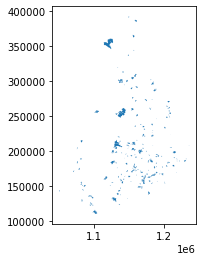

In [24]:
selt.plot()

In [25]:
# Create geojson for map
selt_geojson = selt.to_crs('epsg:4326').__geo_interface__

In [45]:
# Create a basemap
m_selt = geemap.Map(center=nh_center,
                    zoom=8,
                    ee_initialize=False)

# Polygon style
style = {
    "stroke": True,
    "color": "#000000",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.4,
}

m_selt

Map(center=[43.78699687528447, -71.51658744025995], controls=(WidgetControl(options=['position', 'transparent_…

In [27]:
m_selt.add_geojson(selt_geojson, layer_name="Southeast Land Trust")

## Simplify Municipal and Create County Boundaries

In [28]:
pb_poly.head()

,FIPS,NAME,RPA,ACRES,COUNTY,geometry
0,7160,Pittsburg,1,186430.5,7,"POLYGON ((1063158.250 1002584.875, 1063233.000..."
1,7040,Clarksville,1,39915.8,7,"POLYGON ((1059756.000 928359.250, 1059898.250 ..."
2,7005,Atkinson & Gilmanton,1,12351.3,7,"POLYGON ((1111451.250 916720.625, 1111518.250 ..."
3,7190,Stewartstown,1,30019.1,7,"POLYGON ((1019728.688 911317.500, 1019769.188 ..."
4,7175,Second College,1,26773.9,7,"POLYGON ((1117369.750 895118.500, 1117506.500 ..."


<AxesSubplot:>

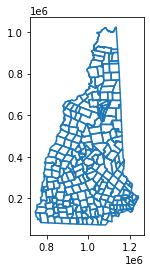

In [29]:
pb_poly.boundary.plot()

In [30]:
# Create GeoDataFrame for county info
counties = gpd.GeoDataFrame(county_map)
counties

,COUNTY_ID,COUNTY_NAME
0,1,Belknap
1,3,Carroll
2,5,Cheshire
3,7,Coos
4,9,Grafton
5,11,Hillsborough
6,13,Merrimack
7,15,Rockingham
8,17,Strafford
9,19,Sullivan


In [31]:
# Loop over pb_poly, select rows by county, combine polygons
for idx, row in counties.iterrows():
    counties.loc[idx, 'geometry'] = pb_poly[pb_poly['COUNTY'] == row['COUNTY_ID']]['geometry'].unary_union

In [32]:
# Set CRS
counties.crs = pb_poly.crs
counties.crs

<Derived Projected CRS: PROJCS["NAD83 / New Hampshire (ftUS)",GEOGCS["NAD8 ...>
Name: NAD83 / New Hampshire (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
counties

,COUNTY_ID,COUNTY_NAME,geometry
0,1,Belknap,"POLYGON ((1015148.688 347257.250, 1014901.375 ..."
1,3,Carroll,"POLYGON ((1126799.250 391095.000, 1126683.000 ..."
2,5,Cheshire,"POLYGON ((834911.250 80684.172, 831492.125 808..."
3,7,Coos,"POLYGON ((1060894.500 610400.000, 1060746.250 ..."
4,9,Grafton,"POLYGON ((929173.375 397185.125, 924505.500 39..."
5,11,Hillsborough,"POLYGON ((974770.125 75048.172, 974622.500 750..."
6,13,Merrimack,"POLYGON ((983544.125 237690.438, 979663.375 23..."
7,15,Rockingham,"POLYGON ((1147664.000 118687.047, 1147544.000 ..."
8,17,Strafford,"POLYGON ((1167108.250 212985.000, 1166733.250 ..."
9,19,Sullivan,"POLYGON ((807159.375 239479.156, 806776.875 23..."


<AxesSubplot:>

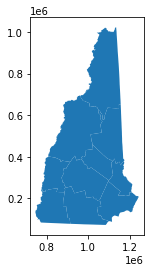

In [34]:
counties.plot()

In [35]:
# Check county areas
area_check = total_areas.loc[:, ['Total acres']]
area_check.reset_index(inplace=True)
area_check['Calcd acres'] = counties.area.apply(sq_ft_to_acres)
area_check['Check'] = area_check['Total acres'] - area_check['Calcd acres']

area_check

,County,Total acres,Calcd acres,Check
0,Belknap,300786.19,3.007859e+05,0.319617
1,Carroll,635817.97,6.358181e+05,-0.132222
2,Cheshire,466514.34,4.665139e+05,0.405549
3,Coos,1171969.27,1.171969e+06,0.629583
4,Grafton,1119743.95,1.119743e+06,0.518849
5,Hillsborough,571152.78,5.711522e+05,0.624471
6,Merrimack,611148.30,6.111477e+05,0.560993
7,Rockingham,465182.48,4.651709e+05,11.598277
8,Strafford,244860.75,2.448606e+05,0.114671
9,Sullivan,353361.90,3.533620e+05,-0.067761


## Spatial Join to find Town and County of Parcels

In [36]:
public.head(2)

,SHAPE_Leng,SHAPE_Area,TID,NAME,NAMEALT,P_NAME,P_NAMEALT,PPTYPE,PPTERMTYPE,PPTERM,SPTYPE1,SPTYPE2,PPAGENCY,PPAGENTYPE,SPAGENCY1,SPAGENCY2,RSIZE,CSIZE,P_RSIZE,P_CSIZE,PROGRAM,LEVEL_,MSTATUS,SOURCE,ACCURACY,COBKPG,DATEREC1,DATEREC2,ACCESS,DATEADDED,DATEALTER,NOTES1,NOTES2,NOTES3,NOTES4,PID,GAP_STATUS,OWNERTYPE,geometry
0,83426.545022,2.163150e+08,006-004 -002,Connecticut Lakes WMA North (West),None,Connecticut Lakes Natural Area,Connecticut Lakes Headwaters,FO,P,-98,CE,CE,32000,3,52010,31000,-999.0,4965.93,25000.0,25001.0,7,1,3,NH DRED/SURVEY,1,07/1018/197,20021230,None,1,20050117,20170418,"Other Programs: LCHIP, N.A. Wetlands Conservat...",BOUNDARY ADJUSTED TO MEET 2009 DRED SURVEY CT ...,Boundary updated to match 006-001 -001,None,006-004 -,3,3,"POLYGON ((1099405.625 1002946.688, 1099033.625..."
1,61619.397201,4.721541e+07,006-004 -003,Connecticut Lakes WMA North (East),None,Connecticut Lakes Natural Area,Connecticut Lakes Headwaters,FO,P,-98,CE,CE,32000,3,52010,31000,-999.0,1083.92,25000.0,25001.0,7,1,3,NH DRED/SURVEY,1,07/1018/197,20021230,None,1,20050117,20170418,"Other Programs: LCHIP, N.A. Wetlands Conservat...",BOUNDARY ADJUSTED TO MEET 2009 DRED SURVEY CT ...,Boundary updated to match 006-001 -001,None,006-004 -,3,3,"POLYGON ((1108214.134 1000715.787, 1108214.125..."


In [37]:
# Spatial join to find town/municipality and county for public land parcels
full = pb_poly.sjoin(public,
                     how='right',
                     predicate='contains',
                     lsuffix='TOWN',
                     rsuffix='TRACT')

In [38]:
full.tail(10)

,index_TOWN,FIPS,NAME_TOWN,RPA,ACRES,COUNTY,SHAPE_Leng,SHAPE_Area,TID,NAME_TRACT,NAMEALT,P_NAME,P_NAMEALT,PPTYPE,PPTERMTYPE,PPTERM,SPTYPE1,SPTYPE2,PPAGENCY,PPAGENTYPE,SPAGENCY1,SPAGENCY2,RSIZE,CSIZE,P_RSIZE,P_CSIZE,PROGRAM,LEVEL_,MSTATUS,SOURCE,ACCURACY,COBKPG,DATEREC1,DATEREC2,ACCESS,DATEADDED,DATEALTER,NOTES1,NOTES2,NOTES3,NOTES4,PID,GAP_STATUS,OWNERTYPE,geometry
12581,184.0,15050.0,Epping,8.0,16775.6,15.0,8404.754624,2.459180e+06,168-043 -002,Limperis,None,Lamprey River Wildlife Preserve,None,FO,P,-98,CE,EI,51960,5,22100,52800,58.1,56.45520,160.4,158.5890,10,1,1,SURVEY,1,15/5657/2871,20150929,None,1,None,20210630,None,PROGRAM:WRE,Candace Thayer added to the total parcel size,None,168-043 -,1,5,"POLYGON ((1154863.831 203934.892, 1154851.060 ..."
12582,184.0,15050.0,Epping,8.0,16775.6,15.0,6290.624674,1.191061e+06,168-043 -001,Suke,None,Lamprey River Wildlife Preserve,None,FO,P,-98,None,None,51960,5,0,0,27.3,27.34310,160.4,158.5890,99,1,2,SURVEY,1,15/4154/0463,20030919,None,1,20040120,20210630,PROGRAM: LAMPREY RIVER ADVISORY COMMITTEE,None,Candace Thayer added to the total parcel size,None,168-043 -,2,5,"POLYGON ((1155420.908 202203.907, 1155402.603 ..."
12583,203.0,15060.0,Fremont,8.0,11142.4,15.0,5379.686554,1.455561e+06,168-128 -001,Mullen,None,Mullen,None,FO,P,-98,CE,None,51960,5,22100,0,33.4,33.41520,33.4,33.4152,0,1,2,SURVEY,1,15/6029/213 + 15/6029/20,20190823,None,1,20210630,None,None,None,None,None,168-128 -,2,5,"POLYGON ((1131175.674 184065.297, 1132215.111 ..."
12584,115.0,17040.0,Milton,9.0,21935.8,17.0,2032.739201,2.401403e+05,127-072 -001,Panish #2,FRPP,Panish #2,FRPP,CE,P,-98,EI,EI,51960,5,22100,40350,-999.0,5.51289,16.0,15.9537,0,1,4,SURVEY,1,17/3539/0337,20070614,None,3,20210630,None,None,None,None,None,127-072 -,4,5,"POLYGON ((1156148.549 344111.880, 1156026.030 ..."
12585,115.0,17040.0,Milton,9.0,21935.8,17.0,2695.447495,4.547987e+05,127-072 -002,Panish #2,FRPP,Panish #2,FRPP,CE,P,-98,EI,EI,51960,5,22100,40350,-999.0,10.44080,16.0,15.9537,0,1,4,SURVEY,1,17/3539/0337,20070614,None,3,20210630,None,None,None,None,None,127-072 -,4,5,"POLYGON ((1157340.852 344455.135, 1156938.664 ..."
12586,184.0,15050.0,Epping,8.0,16775.6,15.0,3298.117398,5.240291e+05,168-129 -001,Reinhold-Johnson,None,Reinhold-Johnson,None,FO,P,-98,None,None,51960,5,0,0,12.0,12.03010,12.0,12.0301,0,1,2,SURVEY,1,15/5968/1243,20181214,None,1,20210630,None,None,None,None,None,168-129 -,2,5,"POLYGON ((1153004.213 210804.186, 1153128.104 ..."
12587,NaN,NaN,NaN,NaN,NaN,NaN,3669.699044,7.235679e+05,141-012 -001,"Rochester #2, CIty of",Copper Lane,"Rochester #2, CIty of",Copper Lane,CE,P,-98,None,None,51960,5,0,0,16.6,16.61090,16.6,16.6109,0,1,2,SURVEY,1,17/4135/0784,20130610,None,1,19980804,20210630,"Was town land in GRANIT, now SELT holds CE.",None,None,None,141-012 -,2,1,"POLYGON ((1180740.348 302823.621, 1180873.284 ..."
12588,NaN,NaN,NaN,NaN,NaN,NaN,11174.532485,6.072182e+06,139-036 -001,Windowmaker Farm,None,Windowmaker Farm,None,CE,U,-99,None,None,51345,5,0,0,117.0,139.39900,117.0,139.3990,0,1,9,Digital Tax Maps,2,None,20141112,None,5,20210706,None,None,None,None,None,139-036 -,9,5,"POLYGON ((1120016.375 313138.688, 1119176.307 ..."
12589,130.0,17020.0,Farmington,9.0,23639.9,17.0,12554.639018,2.727901e+06,139-037 -001,Leary Field and Forest,None,Leary Field and Forest,None,CE,P,-98,None,None,51345,5,0,0,60.0,62.62430,60.0,62.6242,0,9,9,Digital Tax Map,2,None,None,None,5,20210706,None,None,None,None,None,139-037 -,9,5,"POLYGON ((1126636.026 317137.286, 1126661.618 ..."
12590,100.0,3095.0,Wolfeboro,2.0,37405.5,3.0,14517.069265,4.538181e+06,101-032 -001,Whiteface Mountain,None,Whiteface Mountain,None,FO,U,-99,None,None,51210,5,0,0,106.0,104.18300,106.0,104.1830,0,1,9,Digital Tax Map,2,None,None,None,5,20210706,None,None,None,None,None,101-032 -,9,1,"POLYGON ((1130927.556 422499.964, 1131500.009 ..."


In [39]:
full.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12591 entries, 0 to 12590
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index_TOWN  11017 non-null  float64 
 1   FIPS        11017 non-null  float64 
 2   NAME_TOWN   11017 non-null  object  
 3   RPA         11017 non-null  float64 
 4   ACRES       11017 non-null  float64 
 5   COUNTY      11017 non-null  float64 
 6   SHAPE_Leng  12591 non-null  float64 
 7   SHAPE_Area  12591 non-null  float64 
 8   TID         12591 non-null  object  
 9   NAME_TRACT  12591 non-null  object  
 10  NAMEALT     1110 non-null   object  
 11  P_NAME      12591 non-null  object  
 12  P_NAMEALT   336 non-null    object  
 13  PPTYPE      12591 non-null  object  
 14  PPTERMTYPE  12591 non-null  object  
 15  PPTERM      12591 non-null  int64   
 16  SPTYPE1     2460 non-null   object  
 17  SPTYPE2     290 non-null    object  
 18  PPAGENCY    12591 non-null  int64   
 

In [40]:
# Separate the tracts that didn't fall within a town
outsiders = full[full['NAME_TOWN'].isnull()]
outsiders.shape

(1574, 45)

In [46]:
sjoin_by_county = counties.sjoin(public,
                                 how='right',
                                 predicate='contains',
                                 lsuffix='COUNTY',
                                 rsuffix='TRACT')

In [48]:
sjoin_by_county.info()  # 339 tracts overlap counties

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12591 entries, 0 to 12590
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index_COUNTY  12252 non-null  float64 
 1   COUNTY_ID     12252 non-null  float64 
 2   COUNTY_NAME   12252 non-null  object  
 3   SHAPE_Leng    12591 non-null  float64 
 4   SHAPE_Area    12591 non-null  float64 
 5   TID           12591 non-null  object  
 6   NAME          12591 non-null  object  
 7   NAMEALT       1110 non-null   object  
 8   P_NAME        12591 non-null  object  
 9   P_NAMEALT     336 non-null    object  
 10  PPTYPE        12591 non-null  object  
 11  PPTERMTYPE    12591 non-null  object  
 12  PPTERM        12591 non-null  int64   
 13  SPTYPE1       2460 non-null   object  
 14  SPTYPE2       290 non-null    object  
 15  PPAGENCY      12591 non-null  int64   
 16  PPAGENTYPE    12591 non-null  int64   
 17  SPAGENCY1     12591 non-null  int64   
 18

## Map Tracts and Town/County Borders

In [41]:
# Polygon styling

# County borders
county_style = {
    "stroke": True,
    "color": "#000000",
    "weight": 6,
    "opacity": 1,
    "fill": False
}

# Town borders
town_style = {
    "stroke": True,
    "color": "#404040",  # Onyx (dark gray)
    "weight": 2,
    "opacity": 1,
    "fill": False,
}

# Tracts
tract_style = {
    "stroke": True,
    "color": "#8A3497",  # Maximum purple
    "weight": 2,
    "opacity": 1,
    "fill": False,
    "fillColor": "#8A3497",
    "fillOpacity": 0.4,
}

In [42]:
# Create geojson data for map
county_geojson = counties.to_crs('epsg:4326').__geo_interface__
town_geojson = pb_poly.to_crs('epsg:4326').__geo_interface__
outsiders_geojson = outsiders.to_crs('epsg:4326').__geo_interface__

In [43]:
# Create a basemap
m = geemap.Map(center=nh_center,
               zoom=8)

m.add_geojson(county_geojson, style=county_style, layer_name='County')
m.add_geojson(town_geojson, style=town_style, layer_name='Town/Municipality')
m.add_geojson(outsiders_geojson, style=tract_style, layer_name='Outsiders')

m

Map(center=[43.78699687528447, -71.51658744025995], controls=(WidgetControl(options=['position', 'transparent_…